# Support Vector Machines

http://web.mit.edu/6.034/wwwbob/svm-notes-long-08.pdf

| concept | description |
|:-------:|:-----------:|
|Support Vector | point used by a SVM to determine the decision boundary |
|margin	| the “street” on which the decision boundaries are |
|hard margin | no violations of the margin are allowed (less used) |
|soft margin | violations of the margin are allowed (depending on C) |
|Kernel Trick | transformation to a higher-dimensional space to find better boundaries |
|RBF kernel | kernel using a Gaussian function (usually best) |
|polynomial kernel | kernel using a polynomial transformation (more difficult to optimize) |
|`gamma` hyperparameter | determines how many data points are considered as support vectors |
|`C` hyperparameter | inverse regularization strength (L1 norm) |

## Support Vector Classifier

#### SVC gives you better models and feature engineering than a linear alternative!
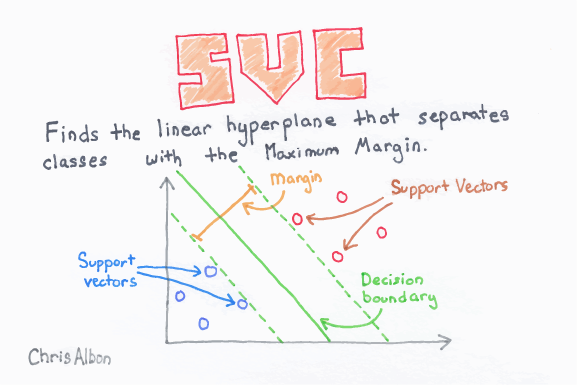

- Support Vector - point used by a SVM to determine the decision boundary
- Margin - the 'street' on which the decision boundaries are
- Soft margin - violations of the margin are allowed (depending on C)
- hard margin - no violations of the margin are allowed (less used)

### Hyperparameters

- **gamma** - Distance to support vectors - determines how many data points are considered as support vectors


- **C** - inverse Regularisation Strength, 1/α (L1 norm) - a factor that has to do with the penalty of these misclassified points! 
    - Correctly called points are labelled 0, they have no penalty! The further the points are from the decision boundary (Hyperplane), the greater the penalty incurred, and then the overall sum of the penalties contribute to the magnitude of the factor C.
    - Your model will try it's best to prevent incurring very large penalties and will adjust the hyperplane accordingly!
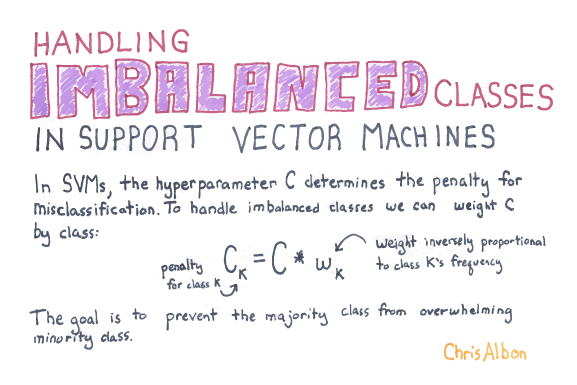


## Must Dos:

- **MUST SCALE THE DATA! Otherwise the maths behind it does not work!**
    - Scaled with **MinMaxScaling!**

## Advantages: 

- **Run Logistic Regression on only Support Vectors** - Support Vector Machines sadly don't give us probabilities, but there is a little trick: Can run a LogRes on the Support Vectors using Scikit!

- **Fast: Big-O notation!**

\begin{align}
\ O(n*m)
\end{align}

**How does the program time change if we change the number of features, n, and/or data points, m?**
    - SVs are proportional: If you double the data points, the time taken is doubled. If you double the number of features, the time taken is doubled. If you double both, the time taken is quadrupled! This is by definition fast for programming!

- require less feature engineering than e.g. logreg
- produce non-linear decision boundaries
- can handle lots of features
- soft-margin is usually better than hard margin

## Disadvantages:

- **Hard to interpret** - We can look at the support vectors but we don't see why they made that decision - it's slightly more black box-y!
- require scaled data
- only two hyperparameters to fine-tune
- do not produce probabilites by themselves
- get very slow for large data sets

## Kernel SVM - RBF Kernel

The **Kernel Trick** transforms to a higher dimensional space to find better boundaries! e.g. when we have the issue of having a non-linearly separable group of points:

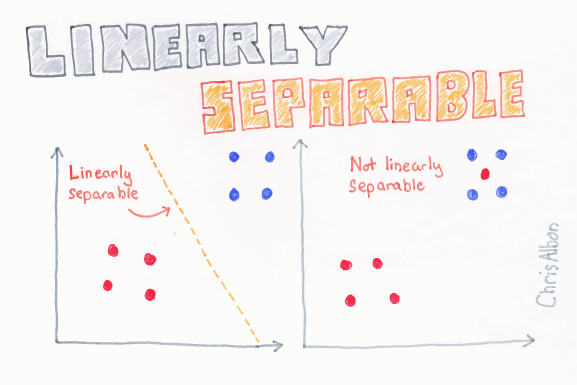

It makes curvy decision boundaries!

**To get it running: Scale the data, then use the RBF Kernel**

But it comes at a cost!

#### Much slower:

\begin{align}
\ O(n*m{^2})
\end{align}
                            
- RBF Kernel - kernel using a Gaussian function (usually best)
- Polynomial Kernel - kernel using a polynomial transformation (more difficult to optimize)

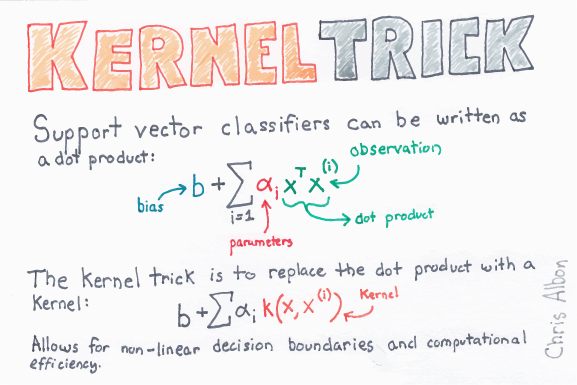

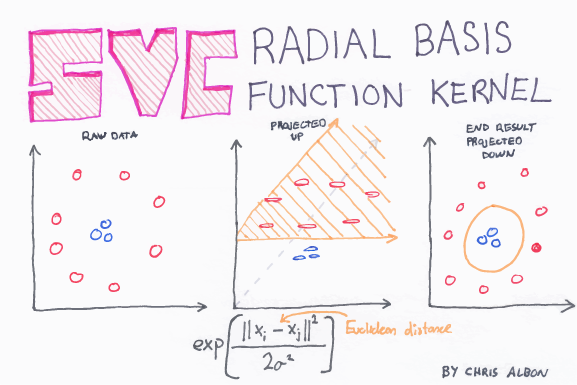

**Types of SVMs in Scikit-Learn**
- Using n features and m data points.

| model | performance | kernel trick | description |
|-------|-------------|--------------|-------------|  
| LinearSVC | O(n∗m) | no | linear decision boundary |
| LinearSVR | - | no | regression |
| SVC | $O(n∗m{^2})$ to $O(n∗m{^3})$ | yes | variety of kernels |
| SVR | - | yes | regression  |

### Soft v. Hard Margin 

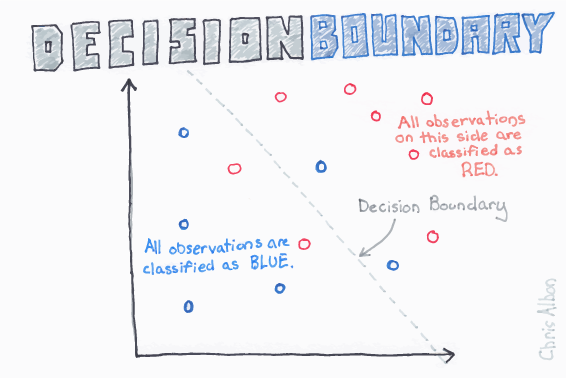

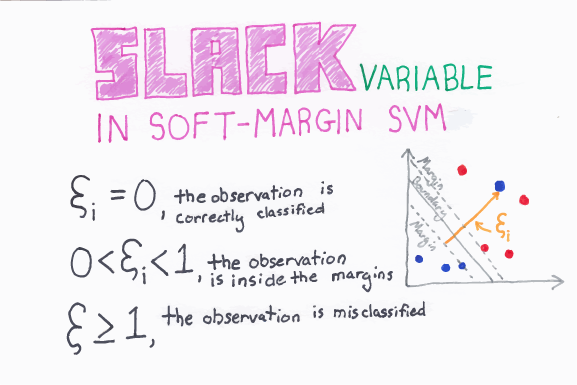

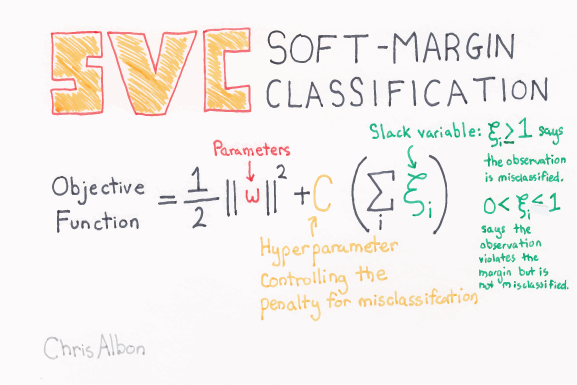

### Example

0.81


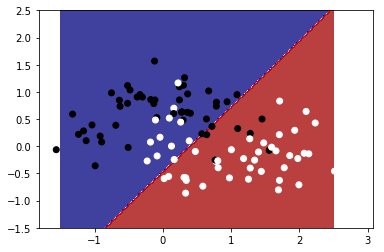

In [2]:
from sklearn.svm import SVC
from sklearn.datasets import make_moons
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

X, y = make_moons(noise=.3, random_state=42)

m = SVC(kernel='rbf', gamma=0.1, C=0.1)
m.fit(X, y)
print(m.score(X, y))

N = 200
coord = np.linspace(-1.5, 2.5, N)
xx, yy = np.meshgrid(coord, coord)

Xpred = np.array(list(zip(xx.reshape(N ** 2), yy.reshape(N ** 2))))
ypred = m.predict(Xpred)

colors = np.array(['black', 'white'])

Z = ypred.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.75, cmap=plt.cm.seismic)

plt.scatter(X[:, 0], X[:, 1], color=colors[y])

plt.show()

### Exercises

1. Why is it important to scale the inputs when using SVMs?
    - Because Support Vector Machine optimization occurs by minimizing the decision vector, the optimal hyperplane is influenced by the scale of the input features and it's therefore recommended that data be standardized (mean 0, var 1) prior to SVM model training with MinMaxScaling!
    
    
2. Can an SVM classifier output a confidence score when it classifies an instance? What about a probability?


3. Should you use the primal or the dual form of the SVM problem to train a model on a training set with millions of instances and hundreds of features?


4. Say you trained an SVM classifier with an RBF kernel. It seems to underfit the training set: should you increase or decrease γ (gamma)? What about C?


5. Train a LinearSVC on a linearly separable dataset. Then train an SVC and a SGDClassifier on the same dataset. See if you can get them to produce roughly the same model.


6. Train an SVM classifier on the MNIST dataset. Since SVM classifiers are binary classifiers, you will need to use one-versus-all to classify all 10 digits. You may want to tune the hyperparameters using small validation sets to speed up the process. What accuracy can you reach?


7. Train an SVM regressor on the California housing dataset.


8. Scaling

    - Create a random dataset with 100 floating-point numbers.

    - Use Numpy to:

        - de-mean the data
        - scale the numbers to a range of -1 to +1
        - scale the numbers to a standard normal distribution